Generate a light curve that approximates a z-2.0 superluminous supernova. Use the transient metric to see how well it gets observed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

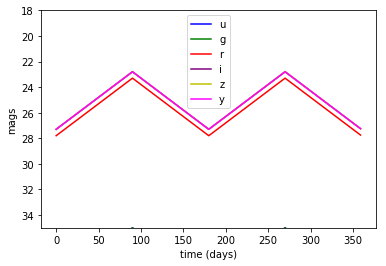

In [2]:
# Trying to make a z=2 superluminous 
peaks = {'uPeak':35., 'gPeak':35., 'rPeak':23.3, 'iPeak':22.8, 'zPeak':22.8,'yPeak':22.8}


colors = ['b','g','r','purple','y','magenta','k']
filterNames = ['u','g','r','i','z','y']

peakTime = 90.
transDuration = peakTime+90. # Days
transMetric = metrics.TransientMetric(riseSlope= -1./20., declineSlope=1./20., mjdCol='observationStartMJD',
                                      transDuration=transDuration, peakTime=peakTime, surveyDuration=2, 
                                      nFilters=3, nPrePeak=3, nPerLC=2, nPhaseCheck=5, **peaks)


times = np.arange(0.,transDuration*2,1) 
for filterName, color in zip(filterNames,colors):
    filters = np.array([filterName]*times.size)
    lc = transMetric.lightCurve(times % transDuration,filters)
    plt.plot(times,lc, color, label=filterName)
plt.xlabel('time (days)')
plt.ylabel('mags')
plt.ylim([35,18])
plt.legend()

In [3]:
# Pick a slicer
slicer = slicers.HealpixSlicer(nside=64)

summaryMetrics = [metrics.MedianMetric()]


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
# Set the database and query
runName = 'baseline2018a'
sqlconstraint = 'night < %f' %(365.25*2)


In [5]:
#This next command assumes you have downloaded baseline2018a.db into the tutorials directory in this repo.
#Change this path according to your datbase and where it is saved.
opsdb = db.OpsimDatabase('../../tutorials/baseline2018a.db')
outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

bundle = metricBundles.MetricBundle(transMetric, slicer, sqlconstraint, 
                                          runName=runName, summaryMetrics=summaryMetrics)
bgroup = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night < 730.500000 for columns ['fiveSigmaDepth', 'observationStartMJD', 'filter', 'fieldDec', 'fieldRA']
Found 453105 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "night < 730.500000" constraint now.
monopole: 0.205588  dipole: lon: -152.134, lat: -43.6664, amp: 0.122435
Plotting complete.


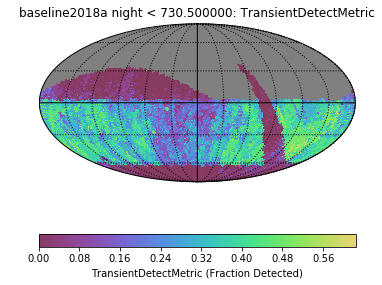

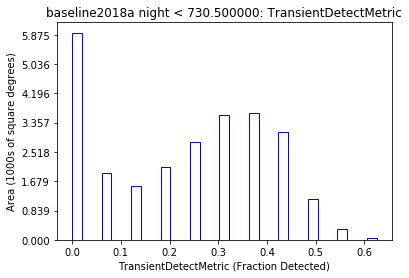

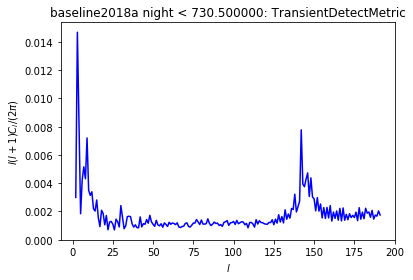

In [6]:
bgroup.plotAll(closefigs=False)